# Function Approximation with Neural Networks

(c) 2021 Fabian Offert

## Imports

We are using PyTorch, the de-facto standard for high-level prototyping for machine learning. Because we are operating in high-dimensional vector space, we are also using Numpy, the Python library for scientific computing. Finally, we are importing Matplotlib to visualize our results.

In [1]:
import torch.nn as nn
import torch
import torch.nn.functional as F

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='html5')

## Parts

PyTorch conveniently provides us with abstractions for many of the most commonly used building blocks of neural networks. For this experiment, we are using three different basic components: fully connected layers, ReLu activation functions, and the mean squared error loss function; training happens through stochastic gradient descent with the Adam optimizer (we will discuss how this works in a later notebook).

### Fully connected layer

This is the standard, multilayer perceptron layer, where every unit of a layer is connected to every unit of the layer before and after. 

### ReLu activation function

[Rectified linear units](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) are the most popular [activation function](https://en.wikipedia.org/wiki/Activation_function) in deep learning. Despite their linear look: 

$$f(x)=\max(0,x)$$

they are actually nonlinear ([piecewise-linear](https://en.wikipedia.org/wiki/Piecewise_linear_function), to be precise). Why? A linear function has to satisfy the condition 

$$\forall_{x,y}: f(x) + f(y) = f(x+y)$$

but for ReLu we have

$$f(1) = 1$$
$$f(-1) = 0$$
$$f(-1) + f(1) = 1$$
$$f(1-1) = 0$$

### Mean squared error loss function

This is one of the most straightforward [loss function](https://en.wikipedia.org/wiki/Loss_function): we just take the distance between all ground truth values and their respective predicted values in a batch, square them, and take the mean:

$$ \text{MSE} = \frac{\sum_{i=1}^{n} y_i - \hat{y}_i}{n}$$



In [9]:
# Define network
class NeuralNetwork(nn.Module):
    def __init__(self, size=256):
        super(NeuralNetwork,self).__init__()
        self.input = nn.Linear(1,size)
        self.hidden_1 = nn.Linear(size,size)
        self.hidden_2 = nn.Linear(size,size)
        self.out = nn.Linear(size,1)
    
    def forward(self,x):
        x = self.input(x)
        x = F.relu(x)
        # x = F.dropout(x) # Try activating this dropout layer
        x = self.hidden_1(x)
        x = F.relu(x)
        # x = F.dropout(x)
        x = self.hidden_2(x)
        x = F.relu(x)
        # x = F.dropout(x)
        x = self.out(x)
        # x = torch.tanh(x)
        return x

In [10]:
# Hyperparameters
network = NeuralNetwork()
optimizer = torch.optim.Adam(network.parameters(), lr = 3e-4)
loss_fn = torch.nn.MSELoss()
batch_size = 128
iterations = 1000

In [11]:
# Data (will be randomly sampled)
train_min = -10
train_max = 10
test_min = -20
test_max = 20

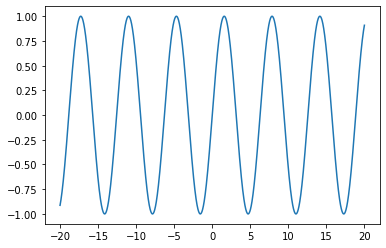

In [12]:
# Function to model
def f(x):
    return np.sin(x)
    # return (x**2)-x*10

x = np.arange(test_min, test_max, 0.01)
y = f(x)
y_min = np.amin(y)
y_max = np.amax(y)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

In [13]:
# Define plot (do not show empty plot)
%%capture
fig, ax = plt.subplots()
ax.set_xlim(test_min, test_max)
ax.set_ylim(y_min, y_max)
title = ax.set_title('')
ground_truth_plot, = ax.plot([], [])
prediction_plot, = ax.plot([], [])

In [14]:
def do_epoch(iteration):
    # Data
    nums = np.random.uniform(train_min, train_max, batch_size)
    x = torch.Tensor(nums)
    y = torch.Tensor(f(nums))
    y = y.view(batch_size, -1)

    # Train
    optimizer.zero_grad()
    output = network(x.view(batch_size, -1))
    loss = loss_fn(y, output)
    loss.backward()
    optimizer.step()

    # Test
    inputs = np.arange(test_min, test_max, 0.01)
    ground_truth = f(inputs)
    with torch.no_grad():
        prediction = network(torch.Tensor(inputs).view(-1, 1)).squeeze().numpy()

    # Plot
    title.set_text(f'Iteration: {iteration+1}')
    ground_truth_plot.set_data(inputs, ground_truth)
    prediction_plot.set_data(inputs, prediction)
    return(ground_truth_plot, prediction_plot) # Return to enable blitting

In [ ]:
FuncAnimation(fig, do_epoch, frames=iterations, repeat=False, blit=True)